# Linear Regression Pre-Workshop Example (Done at a later stage) - 21Apr25 Example
## https://app.edukate.ai/modules/11286/markdown_page/9703

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('/kaggle/input/linregdata/linregdata.csv')
df2 = pd.read_csv("/kaggle/input/real-estate-data/real_estate_data.csv")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linregdata/linregdata.csv
/kaggle/input/real-estate-data/real_estate_data.csv


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   feature1       10 non-null     int64  
 1   feature2       10 non-null     float64
 2   target_column  10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 372.0 bytes


In [3]:
df.head()

,feature1,feature2,target_column
0,1,3.764052,15.580244
1,2,4.400157,24.109019
2,3,6.978738,34.458289
3,4,10.240893,46.966030
4,5,11.867558,56.490400


In [4]:
def quick_eda(df):
    print("─ INFO ─".center(60, "─"))
    df.info()
    
    print("\n─ STATS ─".center(60, "─"))
    display(df.describe(include='all').T)
    
    print("\n─ MISSING & UNIQUE ─".center(60, "─"))
    display(pd.DataFrame({
        "missing":    df.isnull().sum(),
        "unique":     df.nunique(),
        "dtype":      df.dtypes,
        "skew":       df.select_dtypes("number").skew(),
        "mem_usage":  df.memory_usage(deep=True)
    }))
    
    print("\n─ CORRELATION ─".center(60, "─"))
    display(df.corr())

# Usage
quick_eda(df)

─────────────────────────── INFO ───────────────────────────
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   feature1       10 non-null     int64  
 1   feature2       10 non-null     float64
 2   target_column  10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 372.0 bytes
─────────────────────────
─ STATS ──────────────────────────


,count,mean,std,min,25%,50%,75%,max
feature1,10.0,5.500000,3.027650,1.000000,3.250000,5.500000,7.750000,10.000000
feature2,10.0,11.738023,5.609590,3.764052,7.794277,11.445140,15.624004,20.410599
target_column,10.0,58.015362,28.205258,15.580244,37.585224,57.112958,78.311315,99.523604


───────────────────
─ MISSING & UNIQUE ─────────────────────


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,missing,unique,dtype,skew,mem_usage
Index,NaN,NaN,NaN,NaN,132
feature1,0.0,10.0,int64,0.000000,80
feature2,0.0,10.0,float64,-0.019785,80
target_column,0.0,10.0,float64,-0.058924,80


──────────────────────
─ CORRELATION ───────────────────────


,feature1,feature2,target_column
feature1,1.000000,0.987628,0.995491
feature2,0.987628,1.000000,0.996377
target_column,0.995491,0.996377,1.000000


In [5]:
#from ydata_profiling import ProfileReport
#ProfileReport(df, title="Quick EDA", minimal=True)

In [6]:
X = df[["feature1", "feature2"]] #features
y = df["target_column"] #target
print (X)

   feature1   feature2
0         1   3.764052
1         2   4.400157
2         3   6.978738
3         4  10.240893
4         5  11.867558
5         6  11.022722
6         7  14.950088
7         8  15.848643
8         9  17.896781
9        10  20.410599


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=136)

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

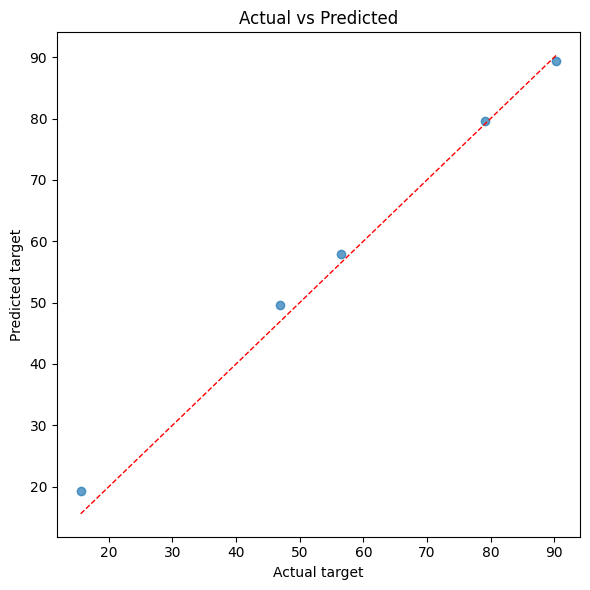

In [11]:
import matplotlib.pyplot as plt

# scatter of true vs. predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
# reference line y=x
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', linewidth=1)
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.title('Actual vs Predicted')
plt.tight_layout()
plt.show()

Ok, let's redo this using the house data now and work through the example!

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 house age                            414 non-null    float64
 1   X2 distance to the nearest MRT station  414 non-null    float64
 2   X3 number of convenience stores         414 non-null    int64  
 3   X4 latitude                             414 non-null    float64
 4   X5 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [13]:
X2 = df2.drop("Y house price of unit area", axis=1) #features
y2 = df2["Y house price of unit area"] #target
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 house age                            414 non-null    float64
 1   X2 distance to the nearest MRT station  414 non-null    float64
 2   X3 number of convenience stores         414 non-null    int64  
 3   X4 latitude                             414 non-null    float64
 4   X5 longitude                            414 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 16.3 KB


In [14]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state=136)

In [15]:
model = LinearRegression()
model.fit(X2_train,y2_train)

LinearRegression()

In [16]:
y2_pred_train = model.predict(X2_train)
y2_pred_test = model.predict(X2_test)

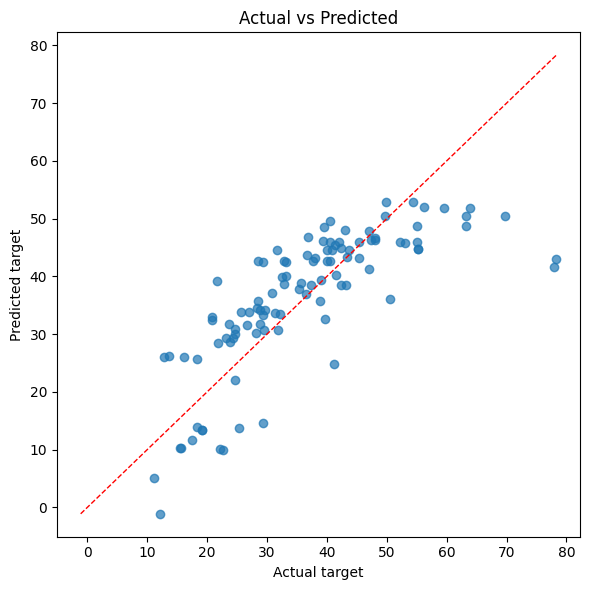

In [17]:
# scatter of true vs. predicted
plt.figure(figsize=(6,6))
plt.scatter(y2_test, y2_pred_test, alpha=0.7)
# reference line y=x
lims = [min(y2_test.min(), y2_pred_test.min()), max(y2_test.max(), y2_pred_test.max())]
plt.plot(lims, lims, 'r--', linewidth=1)
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.title('Actual vs Predicted')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error

# Your code here...
print(f"The MSE for the train set is {mean_squared_error(y2_train, y2_pred_train)}")
print(f"The MSE for the test set is {mean_squared_error(y2_test, y2_pred_test)}")

The MSE for the train set is 78.7927088172362
The MSE for the test set is 84.3171290312782


In [19]:
train_mse = mean_squared_error(y2_train, y2_pred_train)
test_mse  = mean_squared_error(y2_test,  y2_pred_test)

gap = test_mse - train_mse
rel_gap = gap / train_mse * 100

print(f"Generalization gap: {gap:.2f}")
print(f"Relative gap: {rel_gap:.1f}%")

Generalization gap: 5.52
Relative gap: 7.0%


>10% relative difference is fine for demo purposes.

In [20]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    model, X2, y2,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    cv=5
)

train_scores = -cv_results["train_score"]
val_scores   = -cv_results["test_score"]

print("Train MSE  :", train_scores.mean(), "±", train_scores.std())
print("Val MSE    :", val_scores.mean(),   "±", val_scores.std())
print("Gap (mean):", (val_scores.mean() - train_scores.mean()))

Train MSE  : 79.01097203137462 ± 10.344000489408922
Val MSE    : 80.94553966935999 ± 41.13547489888018
Gap (mean): 1.9345676379853671


## My Conclusion
* Mean MSEs are nearly identical, showing no strong sign of overfitting in model. That the MSE is lower for Train MSE than Test MSE shows that it's slightly better at the train data, as would be expected.
* Huge overlap of the validated MSE Standard Errors show low confidence of this conclusion due to an underpowered sample size.

AI-based conclusion:

"Our model’s average prediction error on unseen data is about the same as on the training data (MSE ≈ 80), and the mean generalization gap is very small (≈ 2). However, the high variance in validation errors (± 41) indicates that, given our current dataset size, we lack the statistical power to be certain there isn’t a modest over‑ or under‑fit. Collecting more data or using more stable error estimates (e.g. repeated CV) would tighten those confidence limits."

Let's examine the coefficients of features in the model.

In [21]:
coef_values = pd.DataFrame(data=model.coef_, index=X2.columns, columns=['Coefficient'])
coef_values.loc['intercept'] = model.intercept_
coef_values

,Coefficient
X1 house age,-0.286952
X2 distance to the nearest MRT station,-0.005432
X3 number of convenience stores,0.883835
X4 latitude,198.122832
X5 longitude,-23.446030
intercept,-2052.114040


Latitude has the strongest positive correlation with Y house price of unit area, so increase in latitude strongly increases house price on average. Longitude has the strongest negative correlation, but it's far less than latitude. The other variables are near 0 and so do not seem to have much effect on house price. The reason this could be is maybe because latitude takes us to different countries/states/provinces where regional pricing varies, whereas longitude more often takes us to colder more northern areas where houses have lower demand. It's hard to actually know this at all though without significantly more context and data to drive these predictions.

### BUT I NEED TO SCALE THE COEFFICIENTS to get a realistic comparison of the effect of coefficients on the target value, to control for large changes in the different units used for each feature